In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
from z3 import *

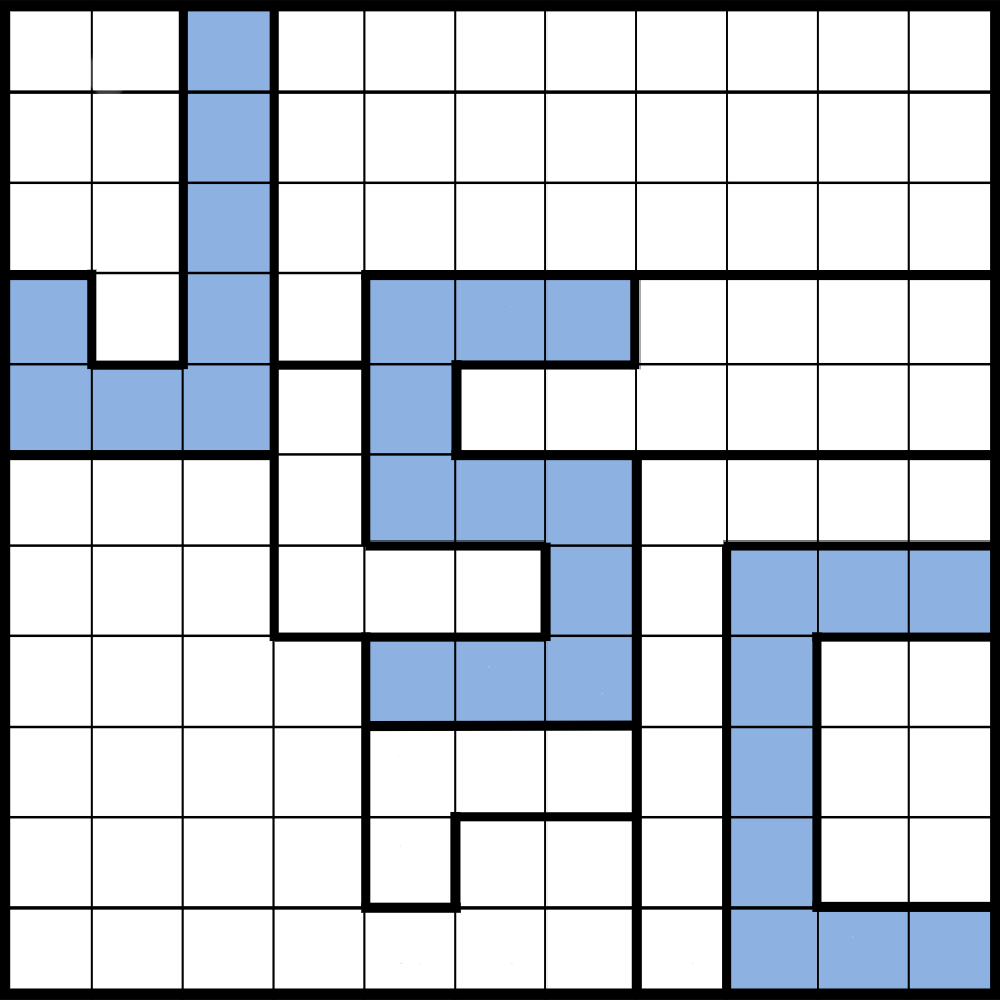

What would happen if Mole didn’t put all the stars back in the galaxy?
Place stars in the grid such that each region, row, and column contains exactly 2 stars. Stars cannot neighbor other stars, even diagonally.

In [2]:
url='https://www.janestreet.com/numberphile-2023/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')

y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Image('https://www.janestreet.com/static/img/new/numberphile-2023/grid-blank.png',width=200))
display(Markdown(str("\n".join(y[27:29]))))

In [4]:
# Cracking the cryptic have solved this so I'm happy posting
# https://youtu.be/euESXLhDsbk?si=s3Pv9T3s--k9kR_h

words = ["sponsorship","recommended","stimulation","stewardship","liquidasset","application","connoisseur",
         "legendaryiq","adventurers","palindromic","mentalasset"]

letters = np.array([[x for x in i] for i in words])


[]

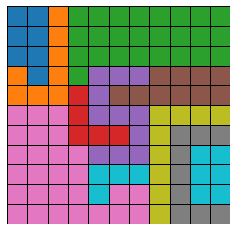

In [5]:
def neigh(x,y,N):
    return [(i+x,j+y) for i,j in [(-1,0),(0,-1),(1,0),(0,1),(-1,-1),(-1,1),(1,-1),(1,1)] if i+x >=0 and i+x <N and j+y >=0 and j+y <N]

grid = np.array([[0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2],
                 [0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2], 
                 [0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2],
                 [1, 0, 1, 2, 4, 4, 4, 5, 5, 5, 5],
                 [1, 1, 1, 3, 4, 5, 5, 5, 5, 5, 5],
                 [6, 6, 6, 3, 4, 4, 4, 8, 8, 8, 8],
                 [6, 6, 6, 3, 3, 3, 4, 8, 7, 7, 7],
                 [6, 6, 6, 6, 4, 4, 4, 8, 7, 9, 9],
                 [6, 6, 6, 6,10,10,10, 8, 7, 9, 9],
                 [6, 6, 6, 6,10, 6, 6, 8, 7, 9, 9],
                 [6, 6, 6, 6, 6, 6, 6, 8, 7, 7, 7]])

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.heatmap(grid,cbar=False,cmap="tab10",linecolor="k",linewidth=1)
ax.axis("off")
plt.plot()

In [6]:
N=11
#set up the solver and variables.
s = Tactic("qffd").solver()

X = np.array(IntVector("h",N**2),dtype=object).reshape((N,N))
s += [And(e>=0,e<=1) for (i,j),e in np.ndenumerate(X)]

s += [Sum([i for i in X[:,i]])==2 for i in range(N)]
s += [Sum([i for i in X[i,:]])==2 for i in range(N)]
s += [Sum([e for (i,j),e in np.ndenumerate(X) if grid[i,j] == n])==2 for n in range(N)]

s += [Implies(X[i,j]==1,And([X[j,k]==0 for j,k in neigh(i,j,N)])) for (i,j),e in np.ndenumerate(X)]


if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    result_x =  evalu(X)
    display(Markdown("# Answer = "+"".join([letters[i,j] if result_x[i,j] == 1 else "" for i in range(N) for j in range(N)])))

# Answer = somesiriusconsequences